# Wearable Device Activity Detection

                

Problem: 30 subjects carried smart phone on the waist to perform following acitvities:
SITTING, LAYING, STANDING, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS

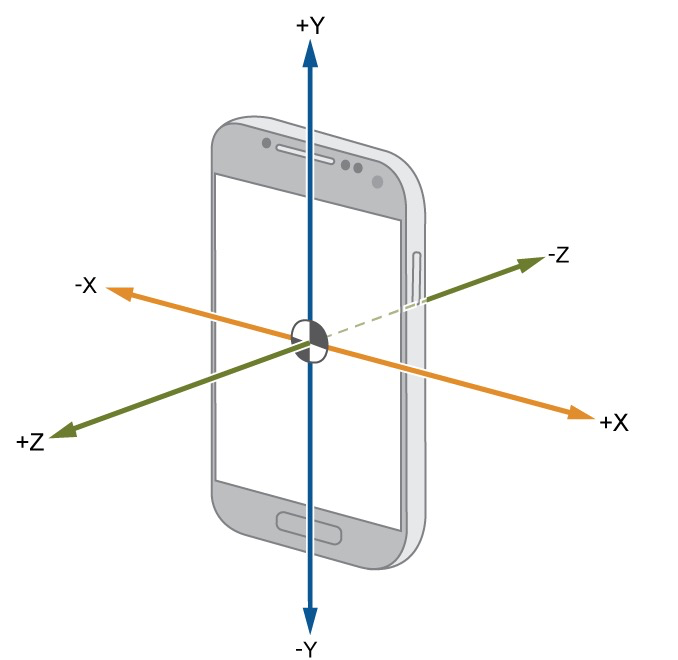
Goal: use accelerometer and gyroscope data to identify subject activity

Conclusions:

1. over 95% accuracy to separate Walking from Stable activity
2. less than 2 mins needed to perform separation
3. based on two sensor data,  people's age, walking pattern might be derived


To improve:

1. Improvement in data collection
2. Improve still activity accuracy
2. More activity to separate features.



In [1]:
import os
import pandas as pd

import numpy as np
from numpy import pi

# Create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Get new datatypes and functions
from collections import Counter
from cycler import cycler

# Build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# To measure time
from time import time

In [2]:
os.chdir('/Users/sisi/Developer/python/har')

train_da=pd.read_csv('train.csv')
test_da=pd.read_csv('test.csv')

train_da['Data'] = 'Train'
test_da['Data'] = 'Test'

# Combine test and train data files
TF=pd.concat([train_da, test_da])

Activity=TF. pop('Activity')
Subject=TF.pop('subject')

In [3]:
TF.info()
print ('Null value is {}'.format(TF.isnull().sum().sum()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 2946
Columns: 562 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(1)
memory usage: 44.2+ MB
Null value is 0


In [4]:
TF.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,Train


In [5]:
TF.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in TF.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyGyro,79
fBodyAcc,79
fBodyAccJerk,79
tBodyAcc,40
tBodyAccJerk,40
tBodyGyro,40
tBodyGyroJerk,40
tGravityAcc,40
fBodyBodyGyroJerkMag,13
fBodyBodyGyroMag,13


# Data Distribution

             Activity  Count
0              LAYING   1944
1            STANDING   1906
2             SITTING   1777
3             WALKING   1722
4    WALKING_UPSTAIRS   1544
5  WALKING_DOWNSTAIRS   1406


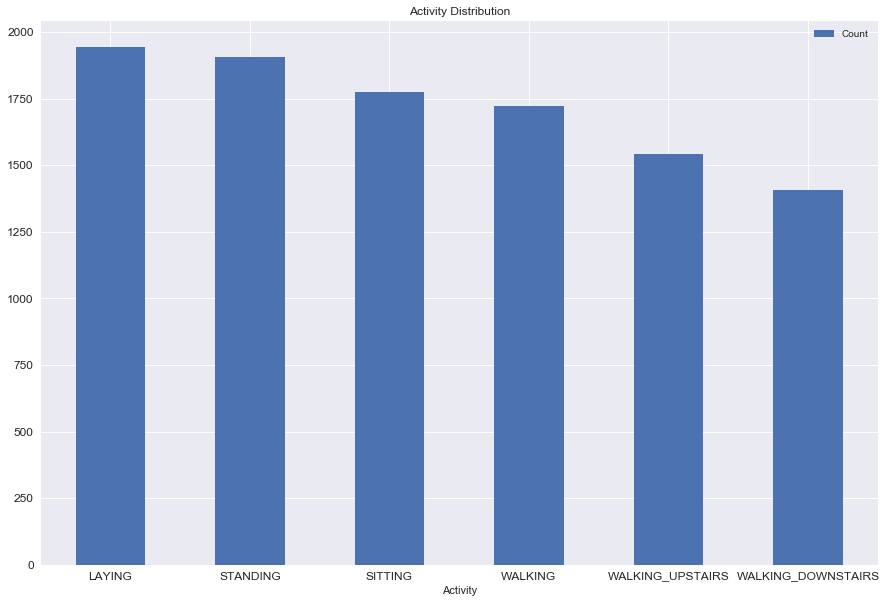

In [7]:
# Evaluate each activity count
Activity_counts=Activity.value_counts()
activity_df=pd.DataFrame(Activity_counts).reset_index()
activity_df.columns=['Activity','Count']
print (activity_df)
activity_df.set_index('Activity').plot.bar(rot=0, title='Activity Distribution', figsize=(15,10), fontsize=12)
plt.show()

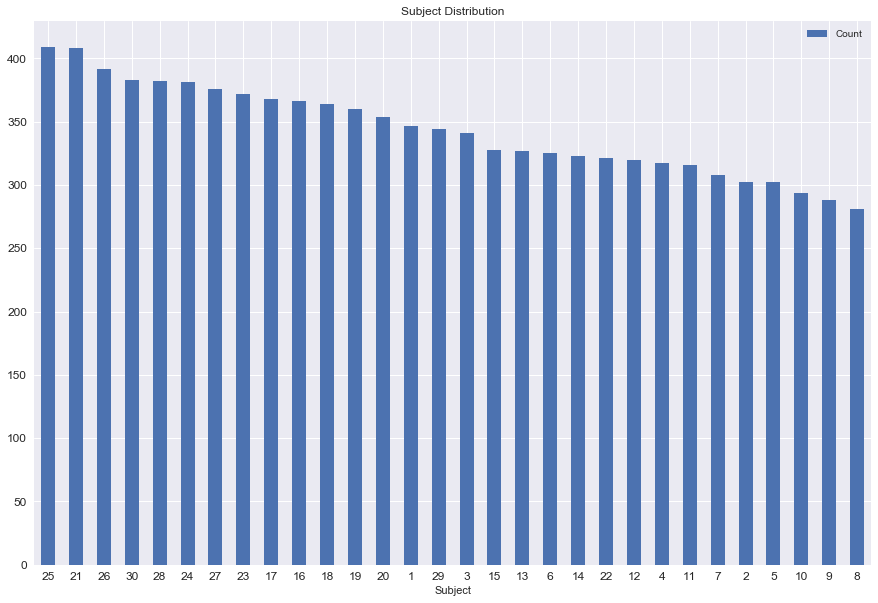

In [8]:
# Evaluate subject data distribution
Subject_counts=Subject.value_counts()
Subject_df=pd.DataFrame(Subject_counts).reset_index()

Subject_df.columns=['Subject','Count']
Subject_df.set_index('Subject').plot.bar(rot=0, title='Subject Distribution', figsize=(15,10), fontsize=12)
plt.show()

In [9]:
tsne_data =pd.concat([train_da, test_da]).copy()
tsne_data.pop('Activity')
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

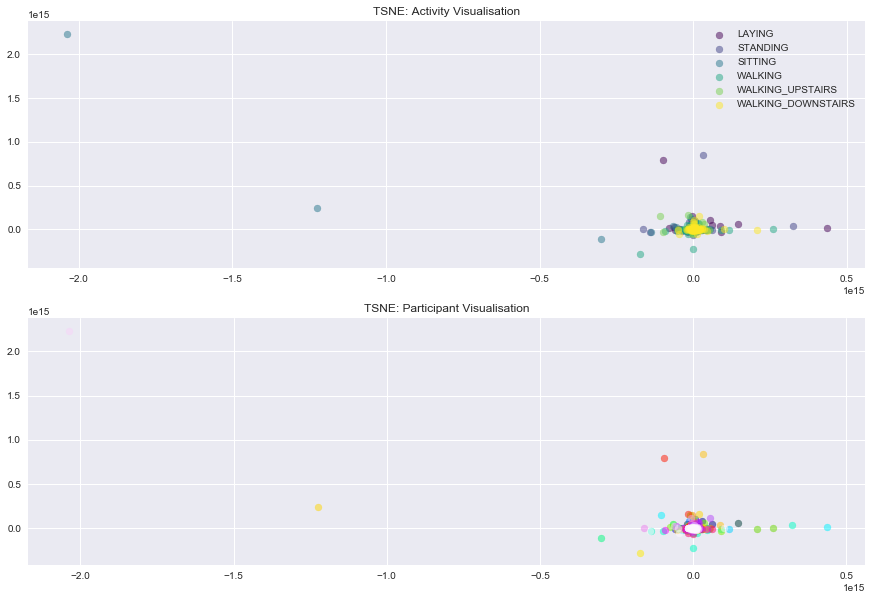

In [10]:
# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(15,10))

### Plot Activities
# Get colors
n = Activity.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(Activity_counts.index):
    # Mask to separate sets
    mask = (Activity==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('TSNE: Activity Visualisation')
axarr[0].legend()


### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('TSNE: Participant Visualisation')
plt.show()

# Model Evaluation

# SVM Model

In [11]:
# SVM


enc = LabelEncoder()
label_encoded = enc.fit_transform(Activity)
X_train, X_test, y_train, y_test = train_test_split(tsne_data, label_encoded, random_state=3)

# Create the model

clf=SVC(gamma='auto')
clf.fit(X_train, y_train)
# Test the model
score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print('Accuracy on testset:\t{:.4f}\n'.format(score))



Accuracy on testset:	0.9192



In [12]:
data=[]
for activity in Activity_counts.index:
    #prepare data
    TF=pd.concat([train_da, test_da])
    acc_data=TF[Activity==activity].copy()
    acc_data_data=acc_data.pop('Data')
    acc_sub_data=acc_data.pop('subject')
    acc_data.pop('Activity')
    
    #transform data
    scl=StandardScaler()
    
    acc_data=scl.fit_transform(acc_data)
    
    pca=PCA(n_components=0.9, random_state=3)
    acc_data=pca.fit_transform(acc_data)
    
    enc=LabelEncoder()
    label_encoded=enc.fit_transform(acc_sub_data)
    
    # Data slice and fit
    X_train, X_test, y_train, y_test=train_test_split(acc_data,label_encoded, random_state=3)
    
    
    print('activity:{}'.format(activity))
    
    clf=SVC(gamma='auto')
    clf.fit(X_train, y_train)
    
    score=accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
    print('Accuracy on testset:\t{:.4f}\n'.format(score))
    data.append([Activity, score])
    
    

activity:LAYING
Accuracy on testset:	0.6523

activity:STANDING
Accuracy on testset:	0.5346

activity:SITTING
Accuracy on testset:	0.5371

activity:WALKING
Accuracy on testset:	0.8051

activity:WALKING_UPSTAIRS
Accuracy on testset:	0.7591

activity:WALKING_DOWNSTAIRS
Accuracy on testset:	0.5540



# GrandientBoosting

In [13]:

data=[]
for activity in Activity_counts.index:
    #prepare data
    TF=pd.concat([train_da, test_da])
    acc_data=TF[Activity==activity].copy()
    acc_data_data=acc_data.pop('Data')
    acc_sub_data=acc_data.pop('subject')
    acc_data.pop('Activity')
    
    #transform data
    scl=StandardScaler()
    acc_data=scl.fit_transform(acc_data)

    pca=PCA(n_components=0.9, random_state=3)
    acc_data=pca.fit_transform(acc_data)

    enc=LabelEncoder()
    label_encoded=enc.fit_transform(acc_sub_data)
    
    # Data slice and fit
    X_train, X_test, y_train, y_test=train_test_split(acc_data,label_encoded, test_size=0.33, random_state=3)
    
    
    print('activity:{}'.format(activity))
    
    gb=GradientBoostingClassifier()
    gb.fit(X_train, y_train)
    
    score=accuracy_score(y_true=y_test, y_pred=gb.predict(X_test))
    print('Accuracy on testset:\t{:.4f}\n'.format(score))
    data.append([Activity, score])
    
    


activity:LAYING
Accuracy on testset:	0.5405

activity:STANDING
Accuracy on testset:	0.4483

activity:SITTING
Accuracy on testset:	0.3935

activity:WALKING
Accuracy on testset:	0.8910

activity:WALKING_UPSTAIRS
Accuracy on testset:	0.7725

activity:WALKING_DOWNSTAIRS
Accuracy on testset:	0.7780



# Logistic Regression

In [14]:
data=[]
for activity in Activity_counts.index:
    #prepare data
    TF=pd.concat([train_da, test_da])
    acc_data=TF[Activity==activity].copy()
    acc_data_data=acc_data.pop('Data')
    acc_sub_data=acc_data.pop('subject')
    acc_data.pop('Activity')
    
    enc=LabelEncoder()
    label_encoded=enc.fit_transform(acc_sub_data)
    
    # data slice and fit 
    X_train, X_test, y_train, y_test=train_test_split(acc_data,label_encoded, test_size=0.33, random_state=42)
    
    
    print('activity:{}'.format(activity))
    
    lr=LogisticRegression(C=100000, fit_intercept=True)
    lr.fit(X_train, y_train)
    
    score=accuracy_score(y_true=y_test, y_pred=lr.predict(X_test))
    print('Accuracy on testset:\t{:.4f}\n'.format(score))
    data.append([Activity, score])

activity:LAYING
Accuracy on testset:	0.7975

activity:STANDING
Accuracy on testset:	0.5739

activity:SITTING
Accuracy on testset:	0.5230

activity:WALKING
Accuracy on testset:	0.9982

activity:WALKING_UPSTAIRS
Accuracy on testset:	0.9980

activity:WALKING_DOWNSTAIRS
Accuracy on testset:	1.0000



# Sensor Importance

{'Gyroscope': 0.19244498418718856, 'Accelerometer': 0.19876601400001276}


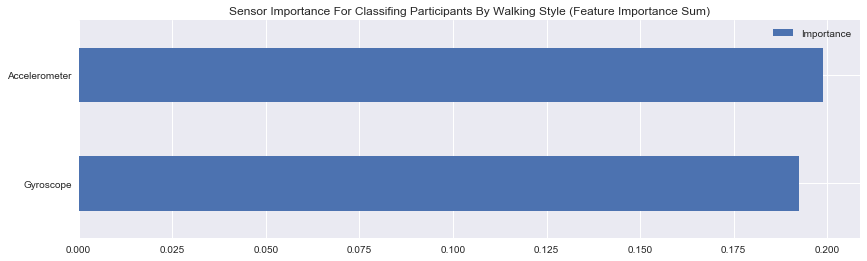

In [15]:
# Identify 'Walking Style' sensor importance 
acc_data=TF[Activity=='WALKING'].copy()
acc_data_data=acc_data.pop('Data')
acc_sub_data=acc_data.pop('subject')
acc_data.pop('Activity')
scl=StandardScaler()
acc_data=scl.fit_transform(acc_data)
    
enc=LabelEncoder()
label_encoded=enc.fit_transform(acc_sub_data)
X_train, X_test, y_train, y_test=train_test_split(acc_data,label_encoded, test_size=0.33, random_state=42)
        
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)


features = TF.drop(['Data', 'subject'], axis=1).columns
importances = gb.feature_importances_

# calculate each sensor's importance
data={'Gyroscope':0, 'Accelerometer':0}
for importance, feature in zip(importances, features):
    if 'Gyro' in feature:
        data['Gyroscope']+=importance
    if 'Acc' in feature:
        data['Accelerometer']+=importance
print (data)

sensor_df = pd.DataFrame.from_dict(data, orient='index').rename(columns={0:'Importance'})
sensor_df.head()
sensor_df.plot(kind='barh', figsize=(14,4), title='Sensor Importance For Classifing Participants By Walking Style (Feature Importance Sum)')
plt.show()

{'Gyroscope': 0.333175243209142, 'Accelerometer': 0.5959858659843661}


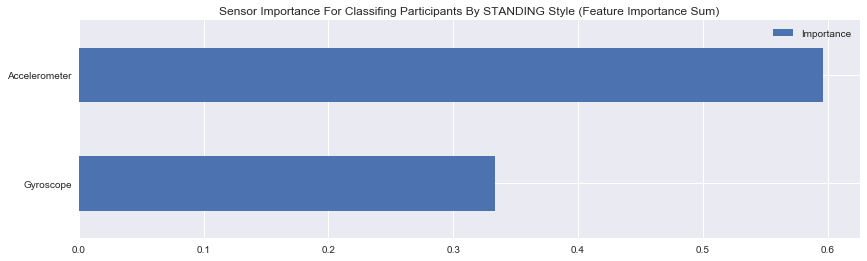

In [16]:
# how about 'Standing' style with relative low accuracy 0.442?

acc_data=TF[Activity=='STANDING'].copy()
acc_data_data=acc_data.pop('Data')
acc_sub_data=acc_data.pop('subject')
acc_data.pop('Activity')

scl=StandardScaler()
acc_data=scl.fit_transform(acc_data)
    
enc=LabelEncoder()
label_encoded=enc.fit_transform(acc_sub_data)
X_train, X_test, y_train, y_test=train_test_split(acc_data,label_encoded, test_size=0.33, random_state=42)
        
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)


features = TF.drop(['Data', 'subject'], axis=1).columns
importances = gb.feature_importances_

# calculate each sensor's importance
data={'Gyroscope':0, 'Accelerometer':0}
for importance, feature in zip(importances, features):
    if 'Gyro' in feature:
        data['Gyroscope']+=importance
    if 'Acc' in feature:
        data['Accelerometer']+=importance
print (data)

sensor_df = pd.DataFrame.from_dict(data, orient='index').rename(columns={0:'Importance'})
sensor_df.head()
sensor_df.plot(kind='barh', figsize=(14,4), title='Sensor Importance For Classifing Participants By STANDING Style (Feature Importance Sum)')
plt.show()

# Logistic Regression Coefficients Comparison

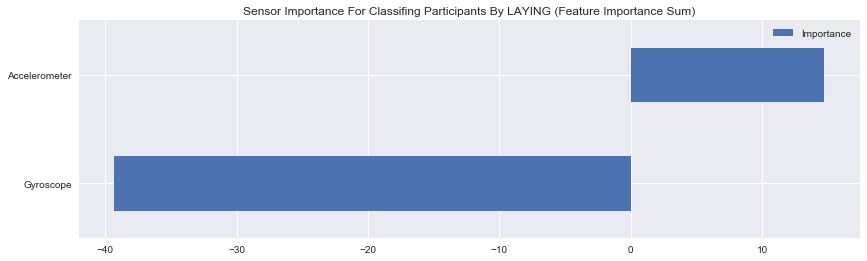

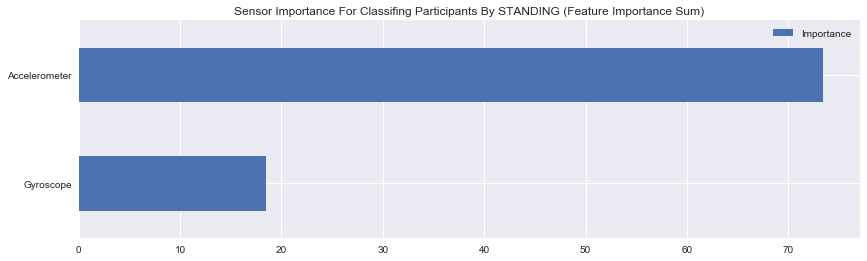

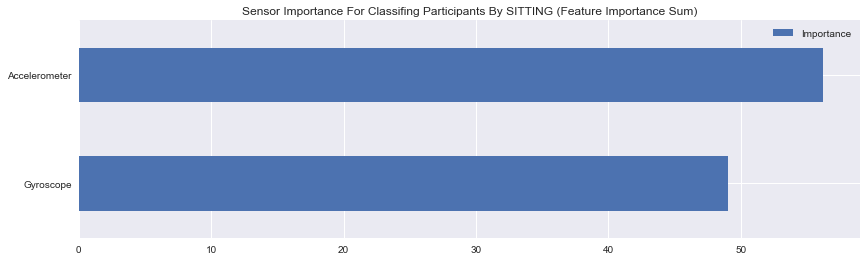

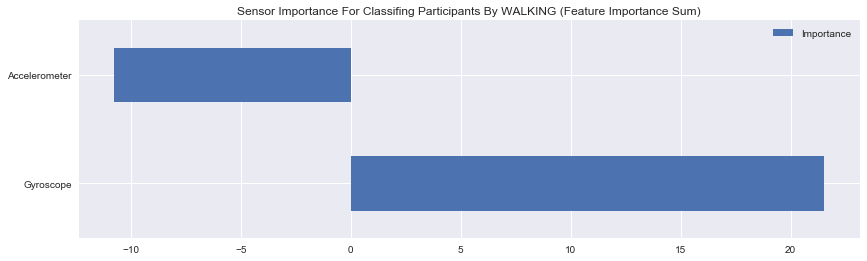

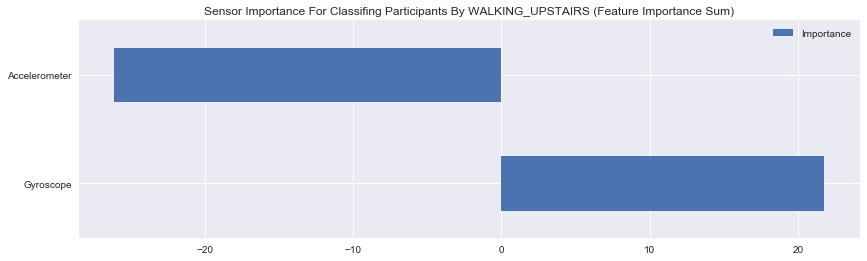

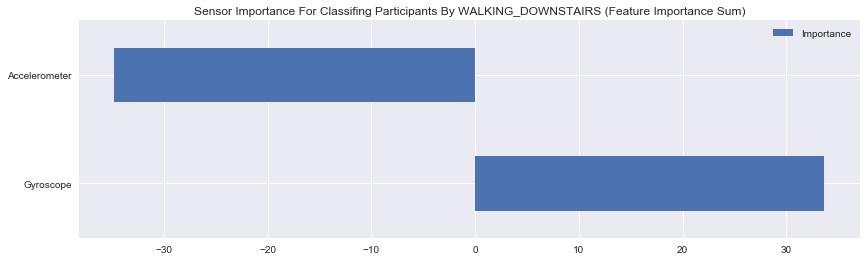

In [17]:
# understand coeffe
for activity in Activity_counts.index:
    TF=pd.concat([train_da, test_da])
    acc_data=TF[Activity==activity].copy()
    acc_data_data=acc_data.pop('Data')
    acc_sub_data=acc_data.pop('subject')
    acc_data.pop('Activity')
    
    
    enc=LabelEncoder()
    label_encoded=enc.fit_transform(acc_sub_data)
                 
    X_train, X_test, y_train, y_test=train_test_split(acc_data,label_encoded, test_size=0.33, random_state=42)
    
    lr=LogisticRegression(C=100000, fit_intercept=True)
    lr.fit(X_train, y_train)

    features = TF.drop(['Data', 'subject'], axis=1).columns

    df_coeffs = pd.DataFrame(list(zip(features, lr.coef_.flatten()))).sort_values(by=[0], ascending=False)
    df_coeffs.columns = ['feature', 'coeff']
    

    data={'Gyroscope':0, 'Accelerometer':0}
    for row in df_coeffs.itertuples():
        if  'Gyro' in row[1]:
            data['Gyroscope']+=row[2]
        if 'Acc' in row[1]:
            data['Accelerometer']+=row[2]


    sensor_lr = pd.DataFrame.from_dict(data, orient='index').rename(columns={0:'Importance'})
    sensor_lr.head()
    sensor_lr.plot(kind='barh', figsize=(14,4), title='Sensor Importance For Classifing Participants By {} (Feature Importance Sum)'.format(activity))
    plt.show()

# Participants Information

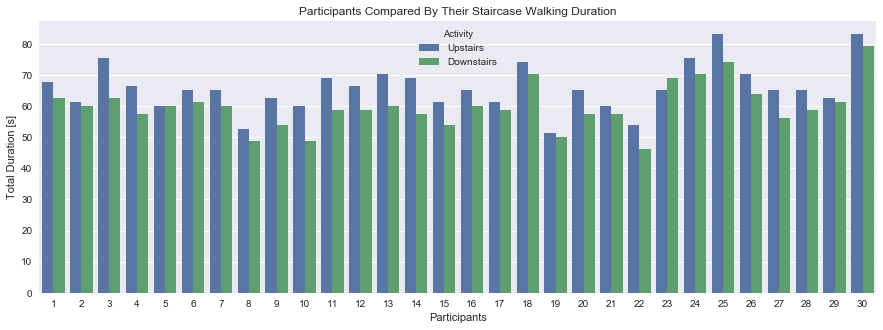

In [18]:
mask = Activity.isin(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])
duration_df = (TF[mask].groupby([Activity[mask], 'subject'])['Data'].count() * 1.28)

# Create plot
plot_data = duration_df.reset_index().sort_values('Data', ascending=False)


plot_data['Activity'] = plot_data['Activity'].map({'WALKING_UPSTAIRS':'Upstairs', 'WALKING_DOWNSTAIRS':'Downstairs'})

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='Data', hue='Activity')
plt.title('Participants Compared By Their Staircase Walking Duration')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.show()

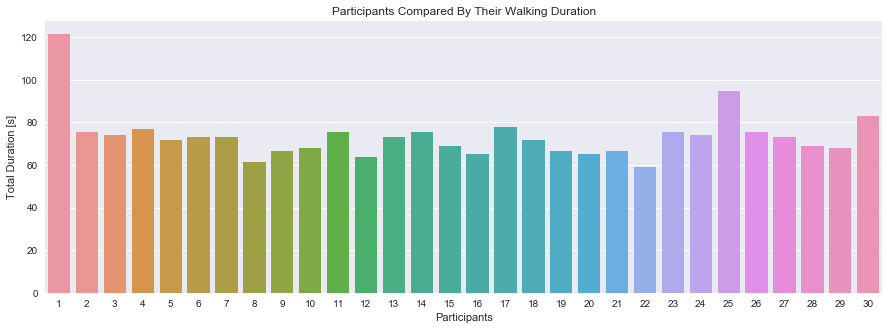

In [19]:
#how much time do participants walk?
mask = Activity=='WALKING'
duration_df = (TF[mask].groupby('subject')['Data'].count() * 1.28)

# Create plot
plot_data = duration_df.reset_index().sort_values('Data', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='Data')
plt.title('Participants Compared By Their Walking Duration')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.show()


